# Análise de Dados

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
df = pd.read_excel('Report-Consolidado-13-08-2024 19H-11M.xlsx')

In [144]:
df.head()

,Segmento,País,Produto,Qtde de Unidades Vendidas,Preço Unitário,Valor Total,Desconto,Valor Total c/ Desconto,Custo Total,Lucro,Data,Mês,Ano
0,Governo,Alemanha,Produto 1,1321.0,20,26420.0,0.0,26420.0,14531.0,11889.0,2019-01-01,Janeiro,2019
1,Governo,Alemanha,Produto 1,1513.0,350,529550.0,0.0,529550.0,432718.0,96832.0,2019-12-01,Dezembro,2019
2,Governo,Alemanha,Produto 2,2146.0,7,15022.0,0.0,15022.0,10730.0,4292.0,2019-09-01,Setembro,2019
3,Governo,Alemanha,Produto 3,1006.0,350,352100.0,0.0,352100.0,261560.0,90540.0,2019-06-01,Junho,2019
4,Governo,Alemanha,Produto 3,1513.0,350,529550.0,0.0,529550.0,393380.0,136170.0,2019-12-01,Dezembro,2019


In [145]:
df.tail()

,Segmento,País,Produto,Qtde de Unidades Vendidas,Preço Unitário,Valor Total,Desconto,Valor Total c/ Desconto,Custo Total,Lucro,Data,Mês,Ano
695,Vendas online,França,Produto 3,2425.5,12,29106.0,3201.66,25904.34,7276.5,18627.84,2019-07-01,Julho,2019
696,Vendas online,França,Produto 5,1734.0,12,20808.0,2288.88,18519.12,5202.0,13317.12,2019-01-01,Janeiro,2019
697,Vendas online,França,Produto 3,1393.0,12,16716.0,2340.24,14375.76,4179.0,10196.76,2019-10-01,Outubro,2019
698,Vendas online,França,Produto 6,1393.0,12,16716.0,2340.24,14375.76,4179.0,10196.76,2019-10-01,Outubro,2019
699,Vendas online,França,Produto 6,2475.0,12,29700.0,4158.00,25542.00,7425.0,18117.00,2019-08-01,Agosto,2019


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Segmento                   700 non-null    object        
 1   País                       700 non-null    object        
 2   Produto                    700 non-null    object        
 3   Qtde de Unidades Vendidas  700 non-null    float64       
 4   Preço Unitário             700 non-null    int64         
 5   Valor Total                700 non-null    float64       
 6   Desconto                   700 non-null    float64       
 7   Valor Total c/ Desconto    700 non-null    float64       
 8   Custo Total                700 non-null    float64       
 9   Lucro                      700 non-null    float64       
 10  Data                       700 non-null    datetime64[ns]
 11  Mês                        700 non-null    object        
 12  Ano     

In [147]:
df.columns

Index(['Segmento', 'País', 'Produto', 'Qtde de Unidades Vendidas',
       'Preço Unitário', 'Valor Total', 'Desconto', 'Valor Total c/ Desconto',
       'Custo Total', 'Lucro', 'Data', 'Mês', 'Ano'],
      dtype='object')

In [148]:
for coluna in df.columns:
    print(f"'{coluna.lower().replace(' ', '_')}',")

'segmento',
'país',
'produto',
'qtde_de_unidades_vendidas',
'preço_unitário',
'valor_total',
'desconto',
'valor_total_c/_desconto',
'custo_total',
'lucro',
'data',
'mês',
'ano',


In [149]:
colunas = [
        'segmento',
        'país',
        'produto',
        'qtde_de_unidades_vendidas',
        'preço_unitário',
        'valor_total',
        'desconto',
        'valor_total_c/_desconto',
        'custo_total',
        'lucro',
        'data',
        'mês',
        'ano', 
]

df.columns = colunas

In [150]:
df.columns

Index(['segmento', 'país', 'produto', 'qtde_de_unidades_vendidas',
       'preço_unitário', 'valor_total', 'desconto', 'valor_total_c/_desconto',
       'custo_total', 'lucro', 'data', 'mês', 'ano'],
      dtype='object')

In [151]:
total_linhas = df.shape[0]

In [152]:
df.isnull().sum() # Zero, por que esta preechido tudo

segmento                     0
país                         0
produto                      0
qtde_de_unidades_vendidas    0
preço_unitário               0
valor_total                  0
desconto                     0
valor_total_c/_desconto      0
custo_total                  0
lucro                        0
data                         0
mês                          0
ano                          0
dtype: int64

In [153]:
df.segmento #Pega somente os valores únicos

0            Governo
1            Governo
2            Governo
3            Governo
4            Governo
           ...      
695    Vendas online
696    Vendas online
697    Vendas online
698    Vendas online
699    Vendas online
Name: segmento, Length: 700, dtype: object

In [154]:
df.segmento.nunique() # nunique é usada para contar o número de valores únicos em uma série do pandas ou em uma coluna de um DataFrame

5

# Análise monetárias

In [156]:
df.describe().round(2)

,qtde_de_unidades_vendidas,preço_unitário,valor_total,desconto,valor_total_c/_desconto,custo_total,lucro,data,ano
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700,700.00
mean,1608.29,118.43,182759.43,13150.35,169609.07,147187.85,22421.22,2019-04-28 21:36:00,2018.75
min,200.00,7.00,1799.00,0.00,1655.08,918.00,-71250.25,2018-09-01 00:00:00,2018.00
25%,905.00,12.00,17391.75,800.32,15928.00,7538.00,2701.80,2018-12-24 06:00:00,2018.75
50%,1542.50,20.00,37980.00,2585.25,35540.20,22580.00,8936.40,2019-05-16 12:00:00,2019.00
75%,2229.12,300.00,279025.00,15956.34,261077.50,248422.50,21155.74,2019-09-08 12:00:00,2019.00
max,4492.50,350.00,1207500.00,149677.50,1159200.00,950625.00,262200.00,2019-12-01 00:00:00,2019.00
std,867.43,136.78,254262.28,22962.93,236726.35,205930.04,42282.73,NaN,0.43


In [157]:
df.describe(include='object').round(2)

,segmento,país,produto,mês
count,700,700,700,700
unique,5,5,6,12
top,Governo,Alemanha,Produto 3,Outubro
freq,300,140,202,140


# Contagem de registros

In [159]:
df.produto.value_counts()

produto
Produto 3    202
Produto 4    109
Produto 5    109
Produto 6     94
Produto 1     93
Produto 2     93
Name: count, dtype: int64

In [160]:
df.segmento.value_counts()

segmento
Governo              300
Grandes empresas     100
Médias empresas      100
Pequenas empresas    100
Vendas online        100
Name: count, dtype: int64

In [161]:
df.país.value_counts()

país
Alemanha    140
Canadá      140
Chile       140
EUA         140
França      140
Name: count, dtype: int64

# Análise de margem de lucro

In [163]:
df.head()

,segmento,país,produto,qtde_de_unidades_vendidas,preço_unitário,valor_total,desconto,valor_total_c/_desconto,custo_total,lucro,data,mês,ano
0,Governo,Alemanha,Produto 1,1321.0,20,26420.0,0.0,26420.0,14531.0,11889.0,2019-01-01,Janeiro,2019
1,Governo,Alemanha,Produto 1,1513.0,350,529550.0,0.0,529550.0,432718.0,96832.0,2019-12-01,Dezembro,2019
2,Governo,Alemanha,Produto 2,2146.0,7,15022.0,0.0,15022.0,10730.0,4292.0,2019-09-01,Setembro,2019
3,Governo,Alemanha,Produto 3,1006.0,350,352100.0,0.0,352100.0,261560.0,90540.0,2019-06-01,Junho,2019
4,Governo,Alemanha,Produto 3,1513.0,350,529550.0,0.0,529550.0,393380.0,136170.0,2019-12-01,Dezembro,2019


# Agrupando dados
## por segmento

In [165]:
df.columns

Index(['segmento', 'país', 'produto', 'qtde_de_unidades_vendidas',
       'preço_unitário', 'valor_total', 'desconto', 'valor_total_c/_desconto',
       'custo_total', 'lucro', 'data', 'mês', 'ano'],
      dtype='object')

In [166]:
colunas = ['valor_total_c/_desconto', 'valor_total', 'lucro'] # Serve guardar essas colunas em variavel, coluna
df_segmento = df.groupby('segmento')[colunas].sum().round(2) # somando o total valor de cada coluna

In [167]:
df_segmento

,valor_total_c/_desconto,valor_total,lucro
segmento,,,
Governo,52504260.67,56403066.5,10919978.17
Grandes empresas,19611694.38,21069000.0,-957187.63
Médias empresas,2381883.08,2582670.0,635783.07
Pequenas empresas,42427918.50,45941700.0,3786918.50
Vendas online,1800593.64,1935162.0,1309359.84


In [168]:
df_segmento['margem_lucro'] = round( (df_segmento['lucro'] / df_segmento['valor_total_c/_desconto']) * 100, 2)

In [169]:
df_segmento

,valor_total_c/_desconto,valor_total,lucro,margem_lucro
segmento,,,,
Governo,52504260.67,56403066.5,10919978.17,20.80
Grandes empresas,19611694.38,21069000.0,-957187.63,-4.88
Médias empresas,2381883.08,2582670.0,635783.07,26.69
Pequenas empresas,42427918.50,45941700.0,3786918.50,8.93
Vendas online,1800593.64,1935162.0,1309359.84,72.72


## Por produto

In [171]:
df_produto = df.groupby('produto')[colunas].sum().round(2)
df_produto['margem_lucro'] = round( (df_produto['lucro'] / df_produto['valor_total_c/_desconto']) *100, 2)

In [172]:
df_produto

,valor_total_c/_desconto,valor_total,lucro,margem_lucro
produto,,,,
Produto 1,13815307.88,14937520.5,627954.58,4.55
Produto 2,15390801.88,16549834.5,2114754.88,13.74
Produto 3,33011143.95,35611662.0,4797437.95,14.53
Produto 4,18250059.46,19826768.5,2305992.46,12.64
Produto 5,20511921.02,21968533.5,3034608.02,14.79
Produto 6,17747116.06,19037279.5,2814104.06,15.86


## por país

In [174]:
df_pais = df.groupby('país')[colunas].sum().round(2)
df_pais['margem_lucro'] = round( (df_pais['lucro'] / df_pais['valor_total_c/_desconto'])* 100, 2)

In [175]:
df_pais

,valor_total_c/_desconto,valor_total,lucro,margem_lucro
país,,,,
Alemanha,23505340.82,24921467.5,3411122.22,14.51
Canadá,24887654.88,26932163.5,3311818.98,13.31
Chile,20949352.11,22726935.0,2658929.81,12.69
EUA,25029830.16,27269358.0,2835405.86,11.33
França,24354172.28,26081674.5,3477575.08,14.28


# Visualização dos dados

## Margem de lucro
## Por segmento

Text(0, 0.5, '% da Margem de lucro')

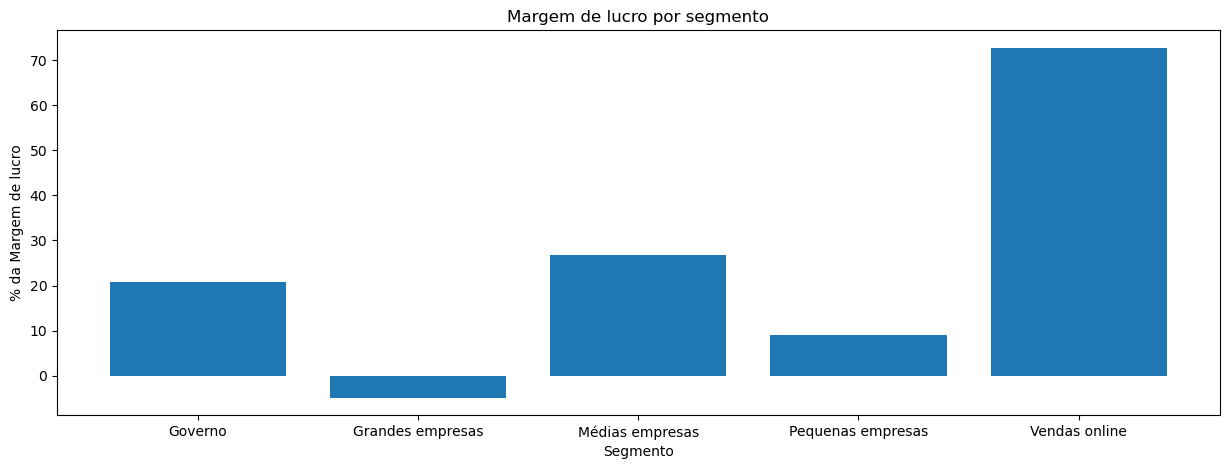

In [178]:
plt.figure(figsize=(15,5))
plt.bar(x=df_segmento.index, height=df_segmento['margem_lucro'])
plt.title('Margem de lucro por segmento')
plt.xlabel("Segmento")
plt.ylabel('% da Margem de lucro')

## Por produto

Text(0, 0.5, '% da margem de lucro')

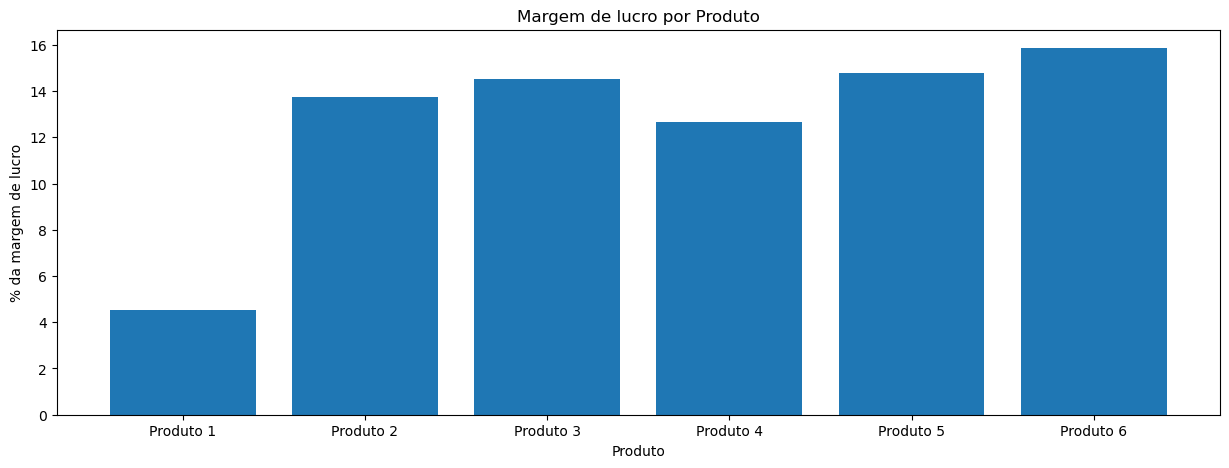

In [180]:
plt.figure(figsize=(15,5))       #figure serve para manipular as firugas, figsize= modifica, o tamanho da figura
plt.bar(x=df_produto.index, height=df_produto['margem_lucro']) #bar() é um grafico de barras
plt.title("Margem de lucro por Produto")  #Titula na parte superio o gráfico
plt.xlabel('Produto')
plt.ylabel('% da margem de lucro')

## Por mês

In [182]:
df_mes = df.groupby(['mês'])[colunas].sum().round(2)
df_mes['margem_lucro'] = round( (df_mes['lucro'] / df_mes['valor_total_c/_desconto']) * 100, 2)
df_mes

,valor_total_c/_desconto,valor_total,lucro,margem_lucro
mês,,,,
Abril,6964775.07,7429392.5,823647.57,11.83
Agosto,5864622.42,6325959.0,724729.22,12.36
Dezembro,17367228.98,18343293.0,2438492.58,14.04
Fevereiro,7297531.39,7699201.0,1146296.49,15.71
Janeiro,6607761.68,7307403.5,807450.18,12.22
Julho,8102920.18,8833027.5,831891.68,10.27
Junho,9518893.82,10268972.0,1359220.82,14.28
Maio,6210211.06,6767911.0,823840.06,13.27
Março,5586859.87,6124026.0,501490.87,8.98


In [183]:
ordem_mes = ['Janeiro',
             'Fevereiro',
             'Março',
             'Abril',
             'Maio',
             'Junho',
             'Julho',
             'Agosto',
             'Setembro',
             'Outubro',
             'Novembro',
             'Dezembro'
            ]
df_mes = df_mes.reindex(ordem_mes)

Text(0, 0.5, '% da margem de lucro')

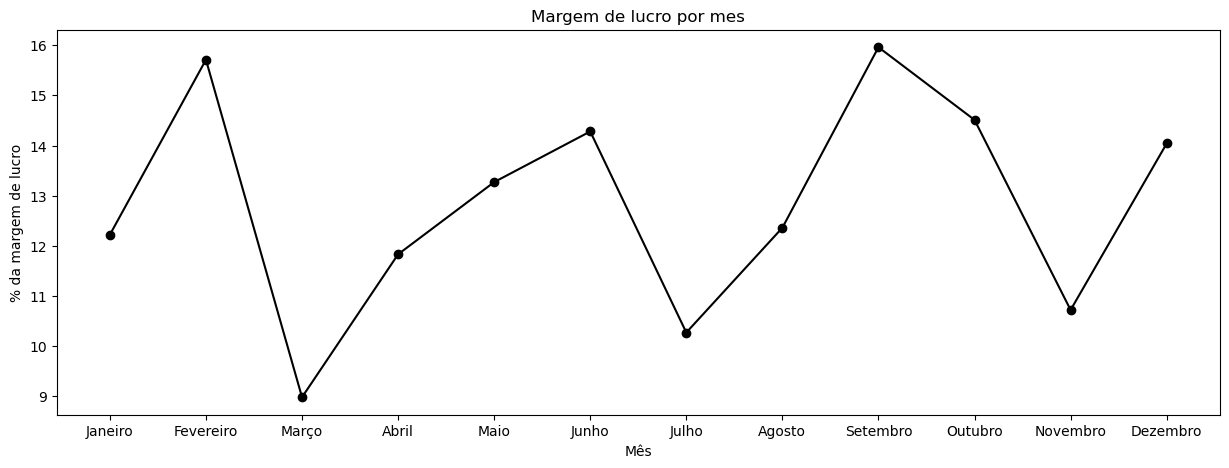

In [184]:
plt.figure(figsize=(15,5))       #figure serve para manipular as firugas, figsize= modifica, o tamanho da figura
plt.plot(df_mes.index, df_mes.margem_lucro, color='black', marker='o')
plt.title("Margem de lucro por mes")
plt.xlabel('Mês')
plt.ylabel('% da margem de lucro')

## Armazenando por ano

In [186]:
df.set_index('data', inplace=True)

In [187]:
df_2019 = df[df.index.year == 2019]
df_2018 = df[df.index.year == 2018]

In [224]:
df_2018

,segmento,país,produto,qtde_de_unidades_vendidas,preço_unitário,valor_total,desconto,valor_total_c/_desconto,custo_total,lucro,mês,ano
data,,,,,,,,,,,,
2018-10-01,Governo,Alemanha,Produto 4,2966.0,350,1038100.0,20762.00,1017338.00,771160.0,246178.00,Outubro,2018
2018-10-01,Governo,Alemanha,Produto 6,2966.0,350,1038100.0,20762.00,1017338.00,771160.0,246178.00,Outubro,2018
2018-09-01,Governo,Alemanha,Produto 2,1797.0,350,628950.0,18868.50,610081.50,467220.0,142861.50,Setembro,2018
2018-10-01,Governo,Alemanha,Produto 2,1159.0,7,8113.0,405.65,7707.35,5795.0,1912.35,Outubro,2018
2018-10-01,Governo,Alemanha,Produto 6,1159.0,7,8113.0,405.65,7707.35,5795.0,1912.35,Outubro,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-01,Vendas online,França,Produto 3,1785.0,12,21420.0,428.40,20991.60,5355.0,15636.60,Novembro,2018
2018-09-01,Vendas online,França,Produto 5,2234.0,12,26808.0,2412.72,24395.28,6702.0,17693.28,Setembro,2018
2018-12-01,Vendas online,França,Produto 6,306.0,12,3672.0,330.48,3341.52,918.0,2423.52,Dezembro,2018


In [226]:
df_2019

,segmento,país,produto,qtde_de_unidades_vendidas,preço_unitário,valor_total,desconto,valor_total_c/_desconto,custo_total,lucro,mês,ano
data,,,,,,,,,,,,
2019-01-01,Governo,Alemanha,Produto 1,1321.0,20,26420.0,0.00,26420.00,14531.0,11889.00,Janeiro,2019
2019-12-01,Governo,Alemanha,Produto 1,1513.0,350,529550.0,0.00,529550.00,432718.0,96832.00,Dezembro,2019
2019-09-01,Governo,Alemanha,Produto 2,2146.0,7,15022.0,0.00,15022.00,10730.0,4292.00,Setembro,2019
2019-06-01,Governo,Alemanha,Produto 3,1006.0,350,352100.0,0.00,352100.00,261560.0,90540.00,Junho,2019
2019-12-01,Governo,Alemanha,Produto 3,1513.0,350,529550.0,0.00,529550.00,393380.0,136170.00,Dezembro,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,Vendas online,França,Produto 3,2425.5,12,29106.0,3201.66,25904.34,7276.5,18627.84,Julho,2019
2019-01-01,Vendas online,França,Produto 5,1734.0,12,20808.0,2288.88,18519.12,5202.0,13317.12,Janeiro,2019
2019-10-01,Vendas online,França,Produto 3,1393.0,12,16716.0,2340.24,14375.76,4179.0,10196.76,Outubro,2019


In [228]:
df.ano.unique()

array([2019, 2018], dtype=int64)